In [1]:
#load class
import numpy as np
import pandas as pd # in case it's not installed then install using conda create -c conda-forge -n name_of_my_env python pandas
# more installations information can be found: https://pandas.pydata.org/docs/getting_started/install.html
import os
#load sklearn module for creating and evaluating ML models. In case sklearn isn't installed,
#follow this link https://scikit-learn.org/stable/install.html for further details on the installation process.
from sklearn.neighbors import KNeighborsClassifier #load your classifier. In this code, I have used KNN. You can choose other algorithms. You have to use at least 3 to complete this.
from sklearn.preprocessing import StandardScaler #module for perform scaling
from sklearn.naive_bayes import GaussianNB

In [2]:
from sklearn.model_selection import train_test_split #module for splittingdatatset
from sklearn import metrics #module for evaluating performance
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load your data
df = pd.read_csv("data.csv") #change the name accordingly
df.head() # prints top 5 rows from the datatset to check data is load or not

,Temp,Humd,Label
0,22.0,33.0,1
1,22.0,33.0,1
2,22.0,33.0,1
3,22.0,33.0,1
4,22.0,33.0,1


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Temp     0
Humd     0
Label    0
dtype: int64


In [5]:
# remove duplicatesd
df = df.drop_duplicates()

In [6]:
# prepare features
x = df.drop(['Label'],axis=1) #remove class or label
y = df['Label'] #load label

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2) #split datatset. Here ratio is 80:20. Change accordingly

In [8]:
# Scale the data using standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) #scale training set
x_test = scaler.transform(x_test) #scale test set

In [9]:
z = KNeighborsClassifier(n_neighbors=3) # KNN classifier for 3 neighbours
KNN = z.fit(x_train,y_train) # start training

In [10]:
predict = KNN.predict(x_test) # performance in the test set

In [11]:
print("Accuracy:", metrics.accuracy_score(y_test,predict)) # evaluating the performance based on accuracy

Accuracy: 1.0


In [12]:
# library for save and load scikit-learn models
import pickle
# file name, recommending *.pickle as a file extension
filename = "model.pickle"
# save model
pickle.dump(z, open(filename, "wb"))

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
tn, fp, fn, tp =cm.ravel()
cm

array([[33,  0],
       [ 0, 51]], dtype=int64)

In [14]:
recall = tp / (tp+fn)
recall

1.0

In [15]:
precision = tp/(tp+fp)
precision

1.0

In [16]:
f1_score = 2*(precision-recall)/(precision+recall)
f1_score

0.0

In [17]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x,y,test_size=.2) #split datatset. Here ratio is 80:20. Change accordingly

In [18]:
# Scale the data using standardization
scaler2 = StandardScaler()
x_train2 = scaler.fit_transform(x_train2) #scale training set
x_test2 = scaler.transform(x_test2) #scale test set

In [19]:
a = GaussianNB()
x_pred = a.fit(x_train2, y_train2).predict(x_test2)

In [20]:
print("Accuracy:", metrics.accuracy_score(y_test2,x_pred)) # evaluating the performance based on accuracy

Accuracy: 1.0


In [21]:
cm2 = confusion_matrix(y_test2, x_pred)
tn2, fp2, fn2, tp2 =cm2.ravel()
cm2

array([[43,  0],
       [ 0, 41]], dtype=int64)

In [22]:
recall2 = tp2 / (tp2+fn2)
recall2

1.0

In [23]:
precision2 = tp2/(tp2+fp2)
precision2

1.0

In [24]:
f1_score2 = 2*(precision2-recall2)/(precision2+recall2)
f1_score2

0.0

Text(0.5, 1.0, 'Confusion Matrix of IoT Sensor Data Using KNN Algorithm')

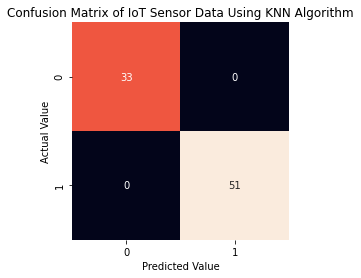

In [25]:
sns.heatmap(cm, square=True, cbar=False, annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix of IoT Sensor Data Using KNN Algorithm')

Text(0.5, 1.0, 'Confusion Matrix of IoT Sensor Data Using GaussianNB Algorithm')

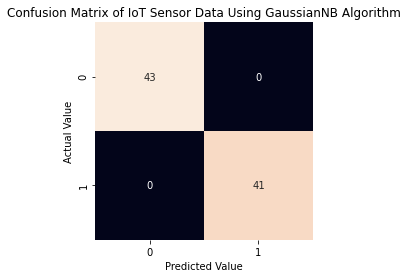

In [27]:
sns.heatmap(cm2, square=True, cbar=False, annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix of IoT Sensor Data Using GaussianNB Algorithm')